## `ANÁLISE DOS DADOS DA MOBILIDADE POR DISTRITOS EM PORTUGAL NO DIA 07/05/2020`



In [1]:
%%!
pip install --trusted-host pypi.org ipython-sql

['Requirement already satisfied: ipython-sql in /Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages (0.3.9)',
 'Requirement already satisfied: six in /Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages (from ipython-sql) (1.14.0)',
 'Requirement already satisfied: ipython>=1.0 in /Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages (from ipython-sql) (7.13.0)',
 'Requirement already satisfied: sqlalchemy>=0.6.7 in /Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages (from ipython-sql) (1.3.16)',
 'Requirement already satisfied: ipython-genutils>=0.1.0 in /Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages (from ipython-sql) (0.2.0)',
 'Requirement already satisfied: sqlparse in /Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages (from ipython-sql) (0.3.1)',
 'Requirement already satisfied: prettytable in /Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages (from ipython-sql) (0.7.2)',
 'Requirement already

In [2]:
%%!
pip install wget

['Requirement already satisfied: wget in /Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages (3.2)']

In [3]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
#sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
#from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice



qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from IPython.display import Image

Application state:
QGIS_PREFIX_PATH env var:		/Users/rafaelamachado/opt/anaconda3/QGIS.app/Contents/MacOS
Prefix:		/Users/rafaelamachado/opt/anaconda3/QGIS.app/Contents/MacOS
Plugin Path:		/Users/rafaelamachado/opt/anaconda3/QGIS.app/Contents/MacOS/../PlugIns/qgis
Package Data Path:	/Users/rafaelamachado/opt/anaconda3/QGIS.app/Contents/MacOS/../Resources
Active Theme Name:	
Active Theme Path:	/Users/rafaelamachado/opt/anaconda3/QGIS.app/Contents/MacOS/../Resources/resources/themes//icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/Users/rafaelamachado/opt/anaconda3/QGIS.app/Contents/MacOS/../Resources/svg/
		/Users/rafaelamachado/Library/Application Support/profiles/default/svg/
User DB Path:	/Users/rafaelamachado/opt/anaconda3/QGIS.app/Contents/MacOS/../Resources/resources/qgis.db
Auth DB Path:	/Users/rafaelamachado/Library/Application Support/profiles/default/qgis-auth.db





## **``` Código para juntar duas camadas com um campo em comum ```**



In [4]:
vectorLyr=QgsVectorLayer("data/Portugal_mobilidade.shp","Portugal_mobilidade","ogr")
vectorLyr.isValid()

uri='summary_reports/summary_report_PT1.csv?delimiter=,'
infoLyr=QgsVectorLayer(uri,'Mobilidade','delimitedtext')
infoLyr.isValid()

QgsProject.instance().addMapLayer(vectorLyr)
QgsProject.instance().addMapLayer(infoLyr)
csvField='sub_region_1'
shpField='distrito'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(infoLyr.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(infoLyr)
vectorLyr.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]

for field in vlayer.fields():
    print("Column "+field.name()+" Load")

Column id Load
Column dicofre Load
Column freguesia Load
Column concelho Load
Column distrito Load
Column taa Load
Column area_ea_ha Load
Column area_t_ha Load
Column des_simpli Load
Column mobilidade Load
Column mobilida_1 Load
Column mobilida_2 Load
Column mobilida_3 Load
Column mobilida_4 Load
Column mobilida_5 Load
Column mobilida_6 Load
Column mobilida_7 Load
Column mobilida_8 Load


In [5]:
from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "distrito"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

## **``` Mapa de Portugal por distritos ```**

576488.5713999998
Gerar mapa com 500 por 1024


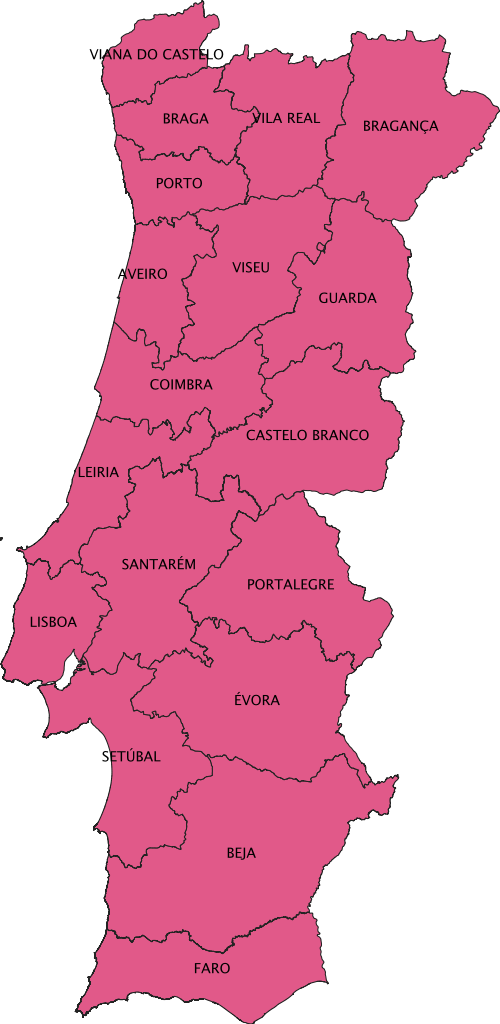

In [6]:
vlayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
xt = vlayer.extent()

print(xt.height())
width  = 500
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('fig/PortugalDistritos.png',"PNG")
Image( imgbuf.data() )

In [7]:
from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
myTargetField = 'mobilida_3'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = -62.0
myMax = -58.1
myLabel = 'Group 1'
myColour = QtGui.QColor('#ADD8E6')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = -58.0
myMax = -53.1
myLabel = 'Group 2'
myColour = QtGui.QColor('#00BFFF')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = -53.0
myMax = -50.1
myLabel = 'Group 3'
myColour = QtGui.QColor('#1E90FF')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#and another
myMin = -50.0
myMax = -48.0
myLabel = 'Group 4'
myColour = QtGui.QColor('#0000CD')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)


myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

myVectorLayer.setRenderer(myRenderer)

## **``` Mapa de Portugal por distritos com os dados de mobilidade```**

**` 1. Mapa de mobilidade em espaços como restaurantes, cafés e shoppings:`** 
`Os distritos com uma cor mais clara apresentam dados de mobilidade mais baixos, sendo que os que aprensentam uma cor mais escura foram os distritos onde se verificou maior mobilidade. `


576488.5713999998
Gerar mapa com 500 por 1024


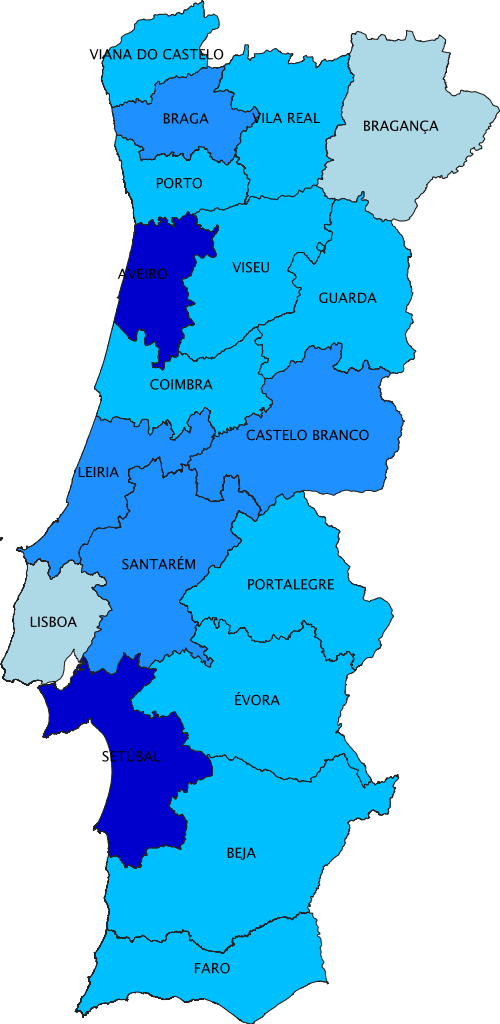

In [8]:
vlayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
xt = vlayer.extent()

print(xt.height())
width  = 500
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))
options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )

image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [9]:
from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
myTargetField = 'mobilida_4'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = -30.0
myMax = -27.1
myLabel = 'GroupA'
myColour1 = QtGui.QColor('#DCDCDC')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour1)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = -27.0
myMax = -24.1
myLabel = 'GroupB'
myColour = QtGui.QColor('#C0C0C0')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = -24.0
myMax = -21.1
myLabel = 'GroupC'
myColour = QtGui.QColor('#A9A9A9')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#and another
myMin = -21.0
myMax = -18.1
myLabel = 'GroupD'
myColour = QtGui.QColor('#808080')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#and another
myMin = -18.0
myMax = -16.0
myLabel1 = 'GroupE'
myColour1 = QtGui.QColor('#4F4F4F')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)



myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

myVectorLayer.setRenderer(myRenderer)

**` 2. Mapa de mobilidade em supermercados e farmácias:`** 
`Os distritos com uma cor mais clara apresentam dados de mobilidade mais baixos, sendo que os que aprensentam uma cor mais escura foram os distritos onde se verificou maior mobilidade. `

576488.5713999998
Gerar mapa com 500 por 1024


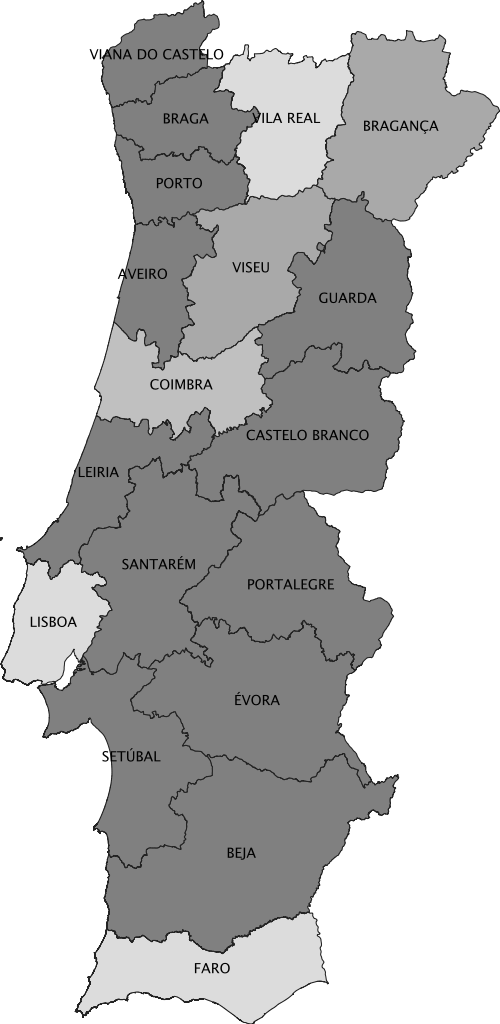

In [10]:
vlayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
xt = vlayer.extent()

print(xt.height())
width  = 500
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))
options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf1= QBuffer()
imgbuf1.open( QIODevice.ReadWrite )

image.save( imgbuf1,"PNG" )
Image( imgbuf1.data() )

In [11]:
from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
myTargetField = 'mobilida_5'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = -52.0
myMax = -38.9
myLabel = 'Groupa'
myColour1 = QtGui.QColor('#98FB98')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour1)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = -38.8
myMax = -19.9
myLabel = 'Groupb'
myColour = QtGui.QColor('#90EE90')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = -19.8
myMax = -7.9
myLabel = 'Groupc'
myColour = QtGui.QColor('#00FA9A')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#and another
myMin = -7.8
myMax = 10.1
myLabel = 'Groupd'
myColour = QtGui.QColor('#3CB371')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#and another
myMin = 10.2
myMax = 23.1
myLabel = 'Groupe'
myColour = QtGui.QColor('#2E8B57')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)


myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

myVectorLayer.setRenderer(myRenderer)

**` 3. Mapa de mobilidade em espaços ao ar livre, como praias, marinas e jardins públicos:`** 
`Os distritos com uma cor mais clara apresentam dados de mobilidade mais baixos, sendo que os que aprensentam uma cor mais escura foram os distritos onde se verificou maior mobilidade. `

576488.5713999998
Gerar mapa com 500 por 1024


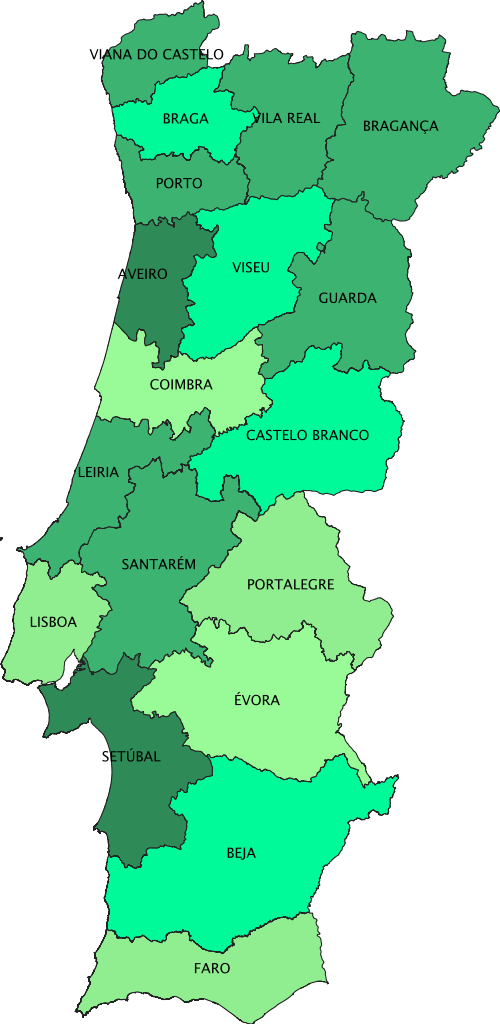

In [12]:
vlayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
xt = vlayer.extent()

print(xt.height())
width  = 500
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))
options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf2= QBuffer()
imgbuf2.open( QIODevice.ReadWrite )

image.save( imgbuf2,"PNG" )
Image( imgbuf2.data() )

In [13]:
from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
myTargetField = 'mobilida_7'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = -58.0
myMax = -56.1
myLabel = 'Groupa'
myColour1 = QtGui.QColor('#F5DEB3')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour1)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = -56.0
myMax = -52.1
myLabel = 'Groupb'
myColour = QtGui.QColor('#FFDEAD')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = -52.0
myMax = -48.1
myLabel = 'Groupc'
myColour = QtGui.QColor('#DEB887')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#and another
myMin = -48.0
myMax = -44.1
myLabel = 'Groupd'
myColour = QtGui.QColor('#F4A460')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#and another
myMin = -44.0
myMax = -40.0
myLabel = 'Groupe'
myColour = QtGui.QColor('#CD853F')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)


myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

myVectorLayer.setRenderer(myRenderer)

**` 4. Mapa de mobilidade em locais de trabalho:`** 
`Os distritos com uma cor mais clara apresentam dados de mobilidade mais baixos, sendo que os que aprensentam uma cor mais escura foram os distritos onde se verificou maior mobilidade. `

576488.5713999998
Gerar mapa com 500 por 1024


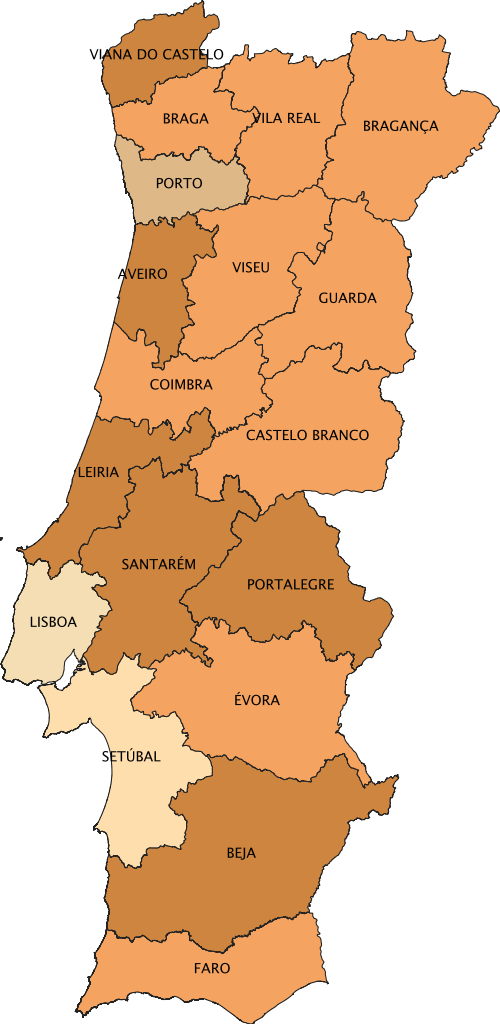

In [14]:
vlayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
xt = vlayer.extent()

print(xt.height())
width  = 500
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))
options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf3= QBuffer()
imgbuf3.open( QIODevice.ReadWrite )

image.save( imgbuf3,"PNG" )
Image( imgbuf3.data() )

In [15]:
from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
myTargetField = 'mobilida_8'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = 17.0
myMax = 20.0
myLabel = 'Groupa'
myColour1 = QtGui.QColor('#FFE4E1')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour1)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 20.1
myMax = 23.0
myLabel = 'Groupb'
myColour = QtGui.QColor('#FFB6C1')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = 23.1
myMax = 26.0
myLabel = 'Groupc'
myColour = QtGui.QColor('#DB7093')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#and another
myMin = 26.1
myMax = 28.0
myLabel = 'Groupd'
myColour = QtGui.QColor('#C71585')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)


myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

myVectorLayer.setRenderer(myRenderer)

**` 1. Mapa de mobilidade em espaços residenciais:`** 
`Os distritos com uma cor mais clara apresentam dados de mobilidade mais baixos, sendo que os que aprensentam uma cor mais escura foram os distritos onde se verificou maior mobilidade. `

576488.5713999998
Gerar mapa com 500 por 1024


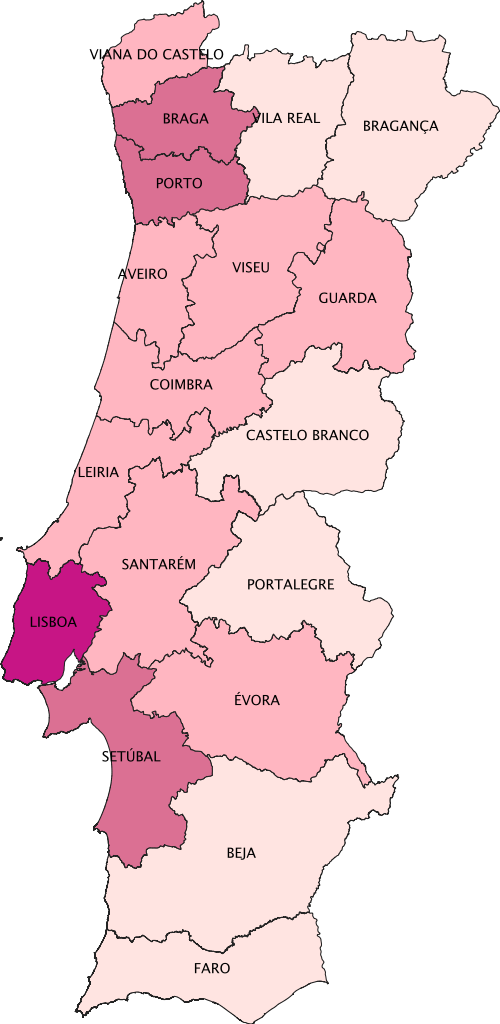

In [16]:
vlayer = QgsProject.instance().mapLayersByName('Portugal_mobilidade')[0]
xt = vlayer.extent()

print(xt.height())
width  = 500
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))
options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf4= QBuffer()
imgbuf4.open( QIODevice.ReadWrite )

image.save( imgbuf4,"PNG" )
Image( imgbuf4.data() )